# Sales figures

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

In [130]:
df_sales = pd.read_excel('salesworkload.xlsx', sheet_name='sales_figures', header=1)

In [131]:
df_sales.head()

,MonthYear,Time index,Country,StoreID,City,Dept_ID,Dept. Name,HoursOwn,HoursLease,Sales units,Turnover,Customer,Area (m2),Opening hours
0,10.2016,1.0,United Kingdom,88253.0,London (I),1.0,Dry,3184.764,0.0,398560.0,1226244.0,NaN,953.04,Type A
1,10.2016,1.0,United Kingdom,88253.0,London (I),2.0,Frozen,1582.941,0.0,82725.0,387810.0,NaN,720.48,Type A
2,10.2016,1.0,United Kingdom,88253.0,London (I),3.0,other,47.205,0.0,438400.0,654657.0,NaN,966.72,Type A
3,10.2016,1.0,United Kingdom,88253.0,London (I),4.0,Fish,1623.852,0.0,309425.0,499434.0,NaN,1053.36,Type A
4,10.2016,1.0,United Kingdom,88253.0,London (I),5.0,Fruits & Vegetables,1759.173,0.0,165515.0,329397.0,NaN,1053.36,Type A


### Fix data type issues

In [132]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7658 entries, 0 to 7657
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MonthYear      7658 non-null   object 
 1   Time index     7650 non-null   float64
 2   Country        7650 non-null   object 
 3   StoreID        7650 non-null   float64
 4   City           7650 non-null   object 
 5   Dept_ID        7650 non-null   float64
 6   Dept. Name     7650 non-null   object 
 7   HoursOwn       7650 non-null   object 
 8   HoursLease     7650 non-null   float64
 9   Sales units    7650 non-null   float64
 10  Turnover       7650 non-null   float64
 11  Customer       0 non-null      float64
 12  Area (m2)      7650 non-null   object 
 13  Opening hours  7650 non-null   object 
dtypes: float64(7), object(7)
memory usage: 837.7+ KB


In [133]:
# fix MonthYear and convert to datetime

df_sales['MonthYear'].unique()

array(['10.2016', ' - - - - ', '11.2016', '12.2016', '01.2017', '02.2017',
       '03.2017', '04.2017', '05.2017', '06.2017'], dtype=object)

In [134]:
df_sales[df_sales['MonthYear'] == ' - - - - ']

,MonthYear,Time index,Country,StoreID,City,Dept_ID,Dept. Name,HoursOwn,HoursLease,Sales units,Turnover,Customer,Area (m2),Opening hours
850,- - - -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1701,- - - -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2552,- - - -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3403,- - - -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4254,- - - -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5105,- - - -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5956,- - - -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6807,- - - -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
df_sales = df_sales[df_sales['MonthYear'] != ' - - - - ']

In [136]:
df_sales['MonthYear'] = pd.to_datetime('01.' + df_sales['MonthYear'], dayfirst=True)

In [137]:
# indexes to int

df_sales[['Time index', 'StoreID', 'Dept_ID']] = df_sales[['Time index', 'StoreID', 'Dept_ID']].astype(int)

In [138]:
# find string value in 'Area (m2)' column

[value for value in df_sales['Area (m2)'].unique() if isinstance(value, str)]

['#NV']

In [139]:
df_sales.loc[df_sales['Area (m2)'] == '#NV', 'Area (m2)'] = np.nan
df_sales['Area (m2)'] = df_sales['Area (m2)'].astype(float)

In [140]:
# find string value in 'HoursOwn' column

[value for value in df_sales['HoursOwn'].unique() if isinstance(value, str)]

['?']

In [141]:
df_sales.loc[df_sales['HoursOwn'] == '?', 'HoursOwn'] = np.nan
df_sales['HoursOwn'] = df_sales['HoursOwn'].astype(float)
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7650 entries, 0 to 7657
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   MonthYear      7650 non-null   datetime64[ns]
 1   Time index     7650 non-null   int64         
 2   Country        7650 non-null   object        
 3   StoreID        7650 non-null   int64         
 4   City           7650 non-null   object        
 5   Dept_ID        7650 non-null   int64         
 6   Dept. Name     7650 non-null   object        
 7   HoursOwn       7648 non-null   float64       
 8   HoursLease     7650 non-null   float64       
 9   Sales units    7650 non-null   float64       
 10  Turnover       7650 non-null   float64       
 11  Customer       0 non-null      float64       
 12  Area (m2)      6800 non-null   float64       
 13  Opening hours  7650 non-null   object        
dtypes: datetime64[ns](1), float64(6), int64(3), object(4)
memory usage: 896.

### Duplicates check

In [142]:
df_sales[df_sales.duplicated()]

,MonthYear,Time index,Country,StoreID,City,Dept_ID,Dept. Name,HoursOwn,HoursLease,Sales units,Turnover,Customer,Area (m2),Opening hours


In [143]:
len(df_sales) == len(df_sales.index)

True

### Missing values

In [144]:
df_sales.isnull().mean() * 100

MonthYear          0.000000
Time index         0.000000
Country            0.000000
StoreID            0.000000
City               0.000000
Dept_ID            0.000000
Dept. Name         0.000000
HoursOwn           0.026144
HoursLease         0.000000
Sales units        0.000000
Turnover           0.000000
Customer         100.000000
Area (m2)         11.111111
Opening hours      0.000000
dtype: float64

In [145]:
# drop column where all values are empty

df_sales.drop('Customer', axis=1, inplace=True)

In [146]:
# period containing missing values of 'Area' column

df_sales[df_sales['Area (m2)'].isna()]['MonthYear'].unique()

array(['2017-06-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [147]:
# fill missing values with mean value by store and department

df_mean_area = df_sales.groupby(['StoreID', 'Dept_ID'], as_index=False) \
                       .agg({'Area (m2)': 'mean'}) \
                       .rename(columns={'Area (m2)': 'mean_area'})
df_sales = df_sales.merge(df_mean_area)
df_sales['Area (m2)'].fillna(df_sales['mean_area'], inplace=True)
df_sales.drop('mean_area', axis=1, inplace=True)

In [148]:
df_mean_hours_own = df_sales.groupby(['StoreID', 'Dept_ID'], as_index=False) \
                            .agg({'HoursOwn': 'mean'}) \
                            .rename(columns={'HoursOwn': 'mean_HoursOwn'})
df_sales = df_sales.merge(df_mean_hours_own)
df_sales['HoursOwn'].fillna(df_sales['mean_HoursOwn'], inplace=True)
df_sales.drop('mean_HoursOwn', axis=1, inplace=True)

### Outliers detection

In [149]:
df_sales.describe()

,Time index,StoreID,Dept_ID,HoursOwn,HoursLease,Sales units,Turnover,Area (m2)
count,7650.000000,7650.000000,7650.000000,7650.000000,7650.000000,7.650000e+03,7.650000e+03,7650.000000
mean,5.000000,61995.220000,9.470588,7721.257213,22.036078,1.076471e+06,3.721393e+06,7557.276935
std,2.582158,29924.581631,5.337429,12320.666026,133.299513,1.728113e+06,6.003380e+06,10726.734047
min,1.000000,12227.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,3.000000,29650.000000,5.000000,1951.926750,0.000000,5.457125e+04,2.726798e+05,563.160000
50%,5.000000,75400.500000,9.000000,3508.905000,0.000000,2.932300e+05,9.319575e+05,1212.960000
75%,7.000000,87703.000000,14.000000,7430.067000,0.000000,9.175075e+05,3.264432e+06,11153.190000
max,9.000000,98422.000000,18.000000,93783.747000,3984.000000,1.124296e+07,4.271739e+07,40853.040000


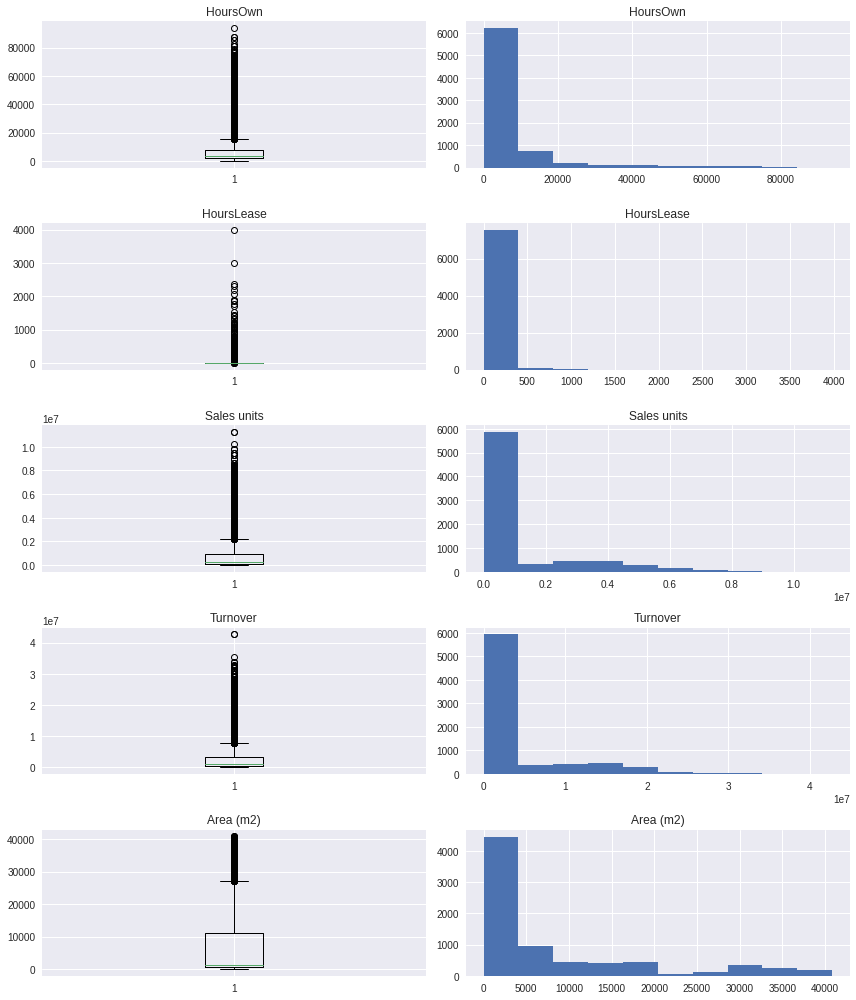

In [150]:
num_columns = ['HoursOwn', 'HoursLease', 'Sales units', 'Turnover', 'Area (m2)']
cat_columns= ['Country', 'City', 'Dept. Name', 'Opening hours']

fig, ax = plt.subplots(5, 2, figsize=(12, 14))
for i, col in enumerate(num_columns):
    ax[i][0].boxplot(df_sales.loc[:, col])
    ax[i][0].set_title(col)
    ax[i][1].hist(df_sales.loc[:, col])
    ax[i][1].set_title(col)
plt.tight_layout()

There are some values which are far from the median but it's all right.

### Categorical features check

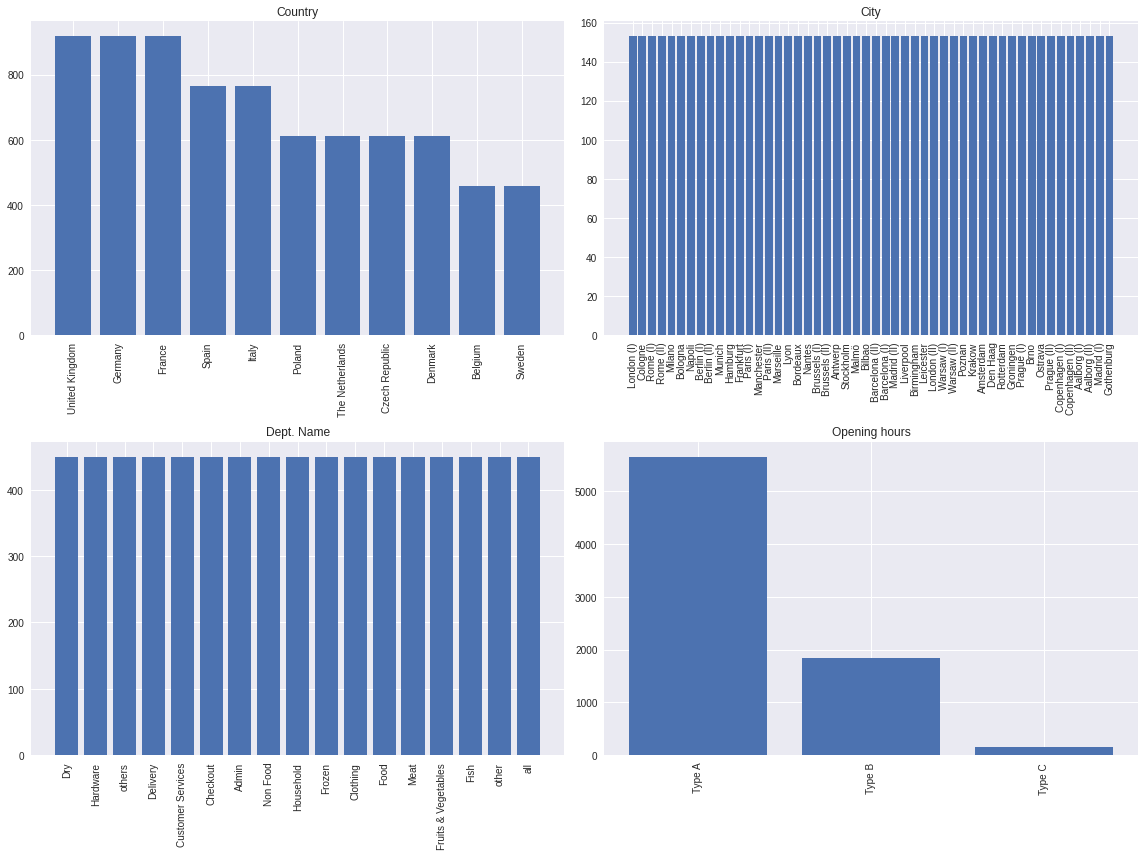

In [151]:
fig, ax = plt.subplots(2, 2, figsize=(16, 12))
for i, col in enumerate(cat_columns):
    data = df_sales.loc[:, col].value_counts()
    ax[i // 2][i % 2].bar(x=data.index, height=data.values)
    ax[i // 2][i % 2].set_title(col)
    ax[i // 2][i % 2].tick_params(axis='x', labelrotation=90)
plt.tight_layout()